<img src="./media/itsoeh.png" width="300" align="center">

Nombre del alumno: **ALAN BAUTISTA CRUZ**

Asignatura: **Matemáticas Aplicadas a Comunicaciones**

Docente: **Saul Isai Soto Ortiz**

Tema: **Serie de Fourier**

Fecha de entrega: **24/11/2025**

### **Evidencia de revisión**

<img src="./media/Evidencia.jpg" width="300" align="center">

### **Ejercicio 1**

$$f(x), \quad -\pi \le x \le \pi$$

<img src="./media/1.jpg" width="350" align="center">
<img src="./media/g1.jpg" width="350" align="center">

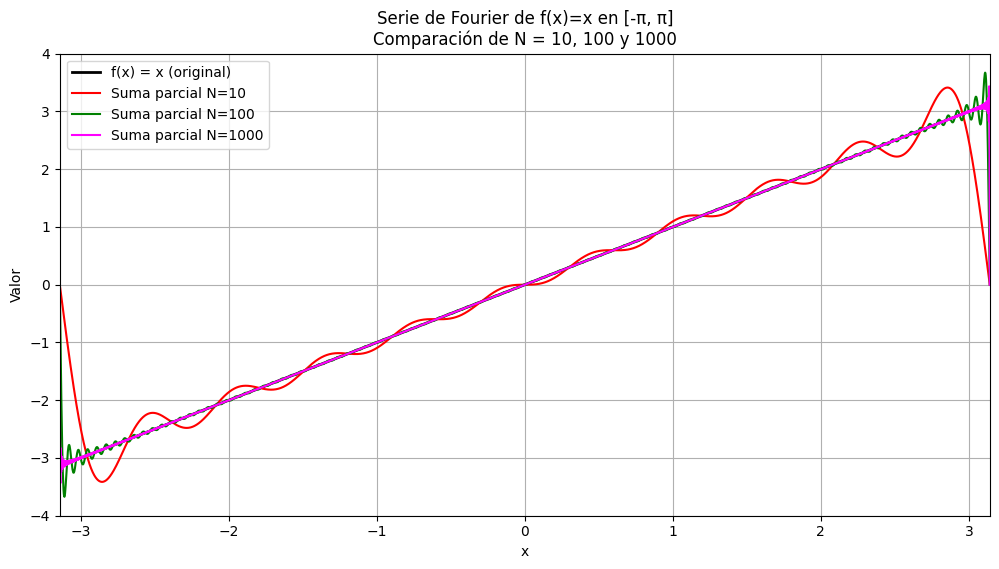

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x

def bn(n):
    return 2 * (-1)**(n + 1) / n

def parcial(N, xs):
    s = np.zeros_like(xs)
    for n in range(1, N+1):
        s += bn(n) * np.sin(n * xs)
    return s

xs = np.linspace(-np.pi, np.pi, 3000)

Ns = [10, 100, 1000]

colores = ['red', 'green', 'magenta'] 

plt.figure(figsize=(12, 6))

plt.plot(xs, f(xs), color='black', linewidth=2, label='f(x) = x (original)')

for N, color_actual in zip(Ns, colores):
    sN = parcial(N, xs)
    plt.plot(xs, sN, color=color_actual, label=f'Suma parcial N={N}')

plt.title('Serie de Fourier de f(x)=x en [-π, π]\nComparación de N = 10, 100 y 1000')
plt.xlabel('x')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xlim(-np.pi, np.pi)
plt.ylim(-4, 4)
plt.show()

### **Ejercicio 2**

$$f(x) = e^{-4x}, \quad -2 \le x \le 2$$

<img src="./media/2.jpg" width="350" align="center">
<img src="./media/g2.jpg" width="350" align="center">

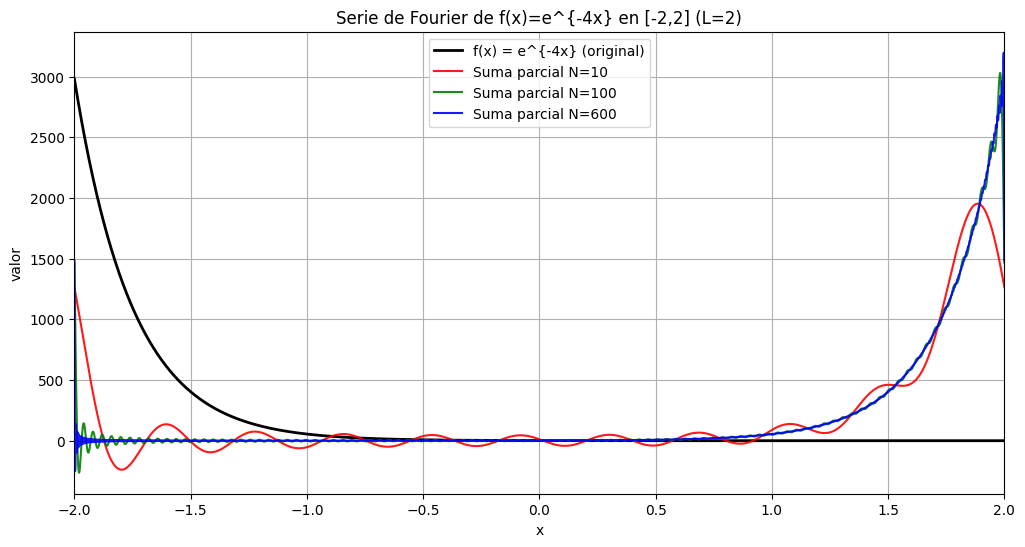

In [12]:
L = 2.0
Ns = [10, 100, 600]
xs = np.linspace(-L, L, 4000)
colores = ['red', 'green', 'blue']

S = np.exp(8.0) - np.exp(-8.0)
P = np.exp(8.0) + np.exp(-8.0)

def beta(n):
    return n * np.pi / 2.0

a0 = (np.exp(8.0) - np.exp(-8.0)) / 8.0

def an(n):
    b = beta(n)
    denom = 16.0 + b*b
    cos2b = np.cos(2.0 * b)
    sin2b = np.sin(2.0 * b)
    num = 4.0 * S * cos2b + b * P * sin2b
    return 0.5 * num / denom

def bn_coef(n):
    b = beta(n)
    denom = 16.0 + b*b
    cos2b = np.cos(2.0 * b)
    sin2b = np.sin(2.0 * b)
    num = 4.0 * S * sin2b - b * P * cos2b
    return 0.5 * num / denom

def suma_parcial(N, xs):
    s = np.full_like(xs, a0/2.0)
    for n in range(1, N+1):
        an_val = an(n)
        bn_val = bn_coef(n)
        s += an_val * np.cos(beta(n) * xs) + bn_val * np.sin(beta(n) * xs)
    return s

def f(x):
    return np.exp(-4.0 * x)

plt.figure(figsize=(12,6))

plt.plot(xs, f(xs), color='black', linewidth=2, label='f(x) = e^{-4x} (original)')

for N, color_actual in zip(Ns, colores):
    sN = suma_parcial(N, xs)
    plt.plot(xs, sN, color=color_actual, label=f'Suma parcial N={N}', alpha=0.9)

plt.title('Serie de Fourier de f(x)=e^{-4x} en [-2,2] (L=2)')
plt.xlabel('x')
plt.ylabel('valor')
plt.legend()
plt.grid(True)
plt.xlim(-L, L)
plt.show()

### **Ejercicio 3**

$$
f(x) = \begin{cases}
0, & \text{si } -\pi \le x < 0 \\
1, & \text{si } 0 \le x < \pi
\end{cases}
$$

<img src="./media/3.jpg" width="350" align="center">
<img src="./media/g3.jpg" width="350" align="center">

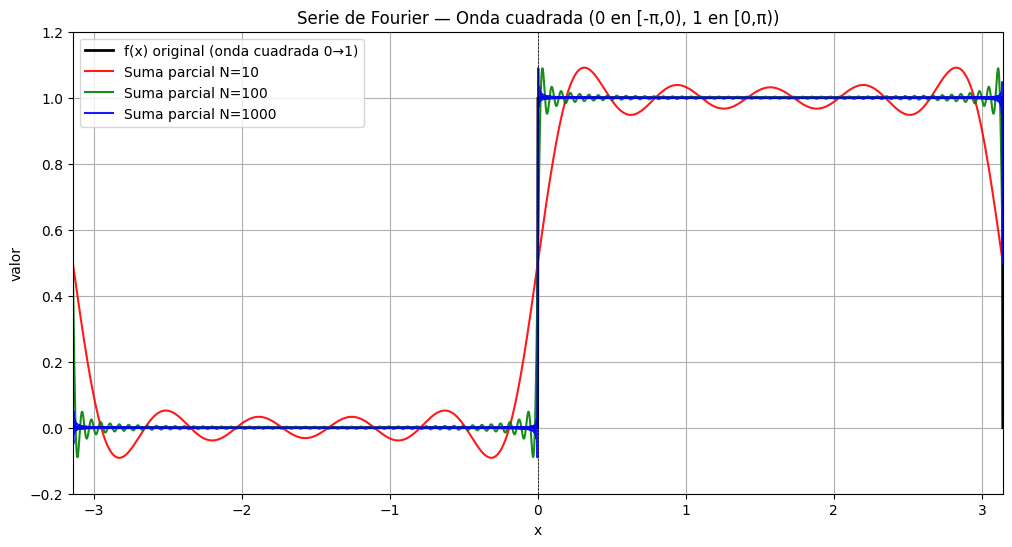

In [16]:
L = np.pi
xs = np.linspace(-L, L, 3000)
colores = ['red', 'green', 'blue']

def f(x):
    x_mod = ((x + np.pi) % (2*np.pi)) - np.pi
    return np.where((x_mod >= 0) & (x_mod < np.pi), 1.0, 0.0)

def b_n(n):
    if n % 2 == 0:
        return 0.0
    else:
        return 2.0 / (np.pi * n)

def suma_parcial(N, xs):
    s = np.full_like(xs, 0.5)
    for n in range(1, N+1):
        bn = b_n(n)
        if bn != 0:
            s += bn * np.sin(n * xs)
    return s

Ns = [10, 100, 1000]

plt.figure(figsize=(12,6))
plt.plot(xs, f(xs), color='black', linewidth=2, label='f(x) original (onda cuadrada 0→1)')

for N, color_actual in zip(Ns, colores):
    sN = suma_parcial(N, xs)
    plt.plot(xs, sN, color=color_actual, label=f'Suma parcial N={N}', alpha=0.9)

plt.title('Serie de Fourier — Onda cuadrada (0 en [-π,0), 1 en [0,π))')
plt.xlabel('x')
plt.ylabel('valor')
plt.legend()
plt.grid(True)
plt.xlim(-np.pi, np.pi)
plt.ylim(-0.2, 1.2)
plt.axvline(0, color='k', linewidth=0.5, linestyle='--')
plt.show()

### **Ejercicio 4**

$$
f(t) = \begin{cases}
0, & \text{si } -\frac{T}{2} \le t < 0 \\
3 \sin(\omega_0 t), & \text{si } 0 \le t \le \frac{T}{2}
\end{cases}, \quad \text{donde } \omega_0 = \frac{2\pi}{T}
$$

<img src="./media/4.jpg" width="350" align="center">
<img src="./media/g4.jpg" width="350" align="center">

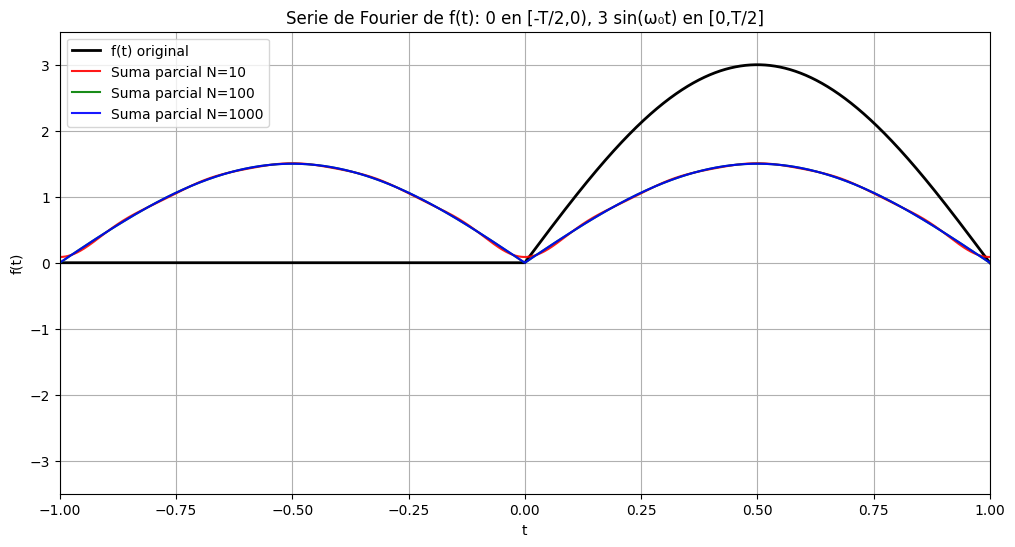

In [15]:
T = 2.0
omega0 = 2 * np.pi / T
L = T / 2
colores = ['red', 'green', 'blue']

def f_original(t):
    return np.where(t < 0, 0.0, 3.0 * np.sin(omega0 * t))

def a0():
    return 6.0 / np.pi

def a_n(n):
    if n % 2 != 0:
        return 0.0
    return -6.0 / (np.pi * (n**2 - 1))

def b_n(n):
    return 0.0

def suma_parcial(N, t):
    s = np.full_like(t, a0()/2)
    for n in range(1, N+1):
        an = a_n(n)
        if an != 0:
            s += an * np.cos(n * omega0 * t)
    return s

t = np.linspace(-L, L, 3000)
Ns = [10, 100, 1000]

plt.figure(figsize=(12,6))
plt.plot(t, f_original(t), color='black', linewidth=2, label='f(t) original')

for N, color_actual in zip(Ns, colores):
    sN = suma_parcial(N, t)
    plt.plot(t, sN, color=color_actual, label=f'Suma parcial N={N}', alpha=0.9)

plt.title('Serie de Fourier de f(t): 0 en [-T/2,0), 3 sin(ω₀t) en [0,T/2]')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.xlim(-L, L)
plt.ylim(-3.5, 3.5)
plt.show()

## Referencias


- [1] M. R. Spiegel, Schaum's Outline of Fourier Analysis with Applications to Boundary Value Problems. Nueva York, NY, EE. UU.: McGraw-Hill Education, 1974.
- [2] D. G. Zill, Differential Equations with Boundary-Value Problems, 9.ª ed. Boston, MA, EE. UU.: Cengage Learning, 2017.
- [3] E. Kreyszig, Advanced Engineering Mathematics, 10.ª ed. Hoboken, NJ, EE. UU.: John Wiley & Sons, 2011.
- [4] H. P. Hsu, Schaum's Outline of Signals and Systems, 4.ª ed. Nueva York, NY, EE. UU.: McGraw-Hill Education, 2019.